In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate, Dense, Input

import pandas as pd

import os
import joblib


import matplotlib.pyplot as plt

In [ ]:
os.makedirs("drive")

In [ ]:
from google.colab import drive
drive.mount("./drive")

Mounted at ./drive


In [ ]:
DATA_DIR  = "./drive/MyDrive/vulnerability_dataset"

model1 = tf.keras.models.load_model(os.path.join(DATA_DIR,"vulcnn.h5"))


# Extract features from CNN model

# Extract features from RF model
X_rf_features = rf_model.apply(X_dataset)

# Concatenate or stack the features
X_combined = np.concatenate((X_cnn_features, X_rf_features), axis=1)

# Split the combined features and target variable into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_dataset, test_size=0.2, random_state=42)

# Train a new classification model on the combined features
input_shape = X_combined.shape[1]
input_layer = Input(shape=(input_shape,))
hidden_layer = Dense(64, activation='relu')(input_layer)
output_layer = Dense(num_classes, activation='softmax')(hidden_layer)

combined_model = Model(inputs=input_layer, outputs=output_layer)
combined_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
combined_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


In [ ]:
data = pd.read_csv(os.path.join(DATA_DIR,'vulnerability_train.csv'))
data=data.sample(frac=1)
data=data.dropna()

In [ ]:
X=data['source_code']
y=np.array([data['CWE114'].values,data['CWE134'].values,data['CWE190'].values,data['CWE196'].values,data['CWE319'].values,data['CWE369'].values,data['CWE398'].values,data['CWE416'].values,data['CWE427'].values,data['CWE469'].values,data['CWE506'].values,data['CWE605'].values,data['CWE606'].values,data['CWE666'].values,data['CWE680'].values,data['CWE761'].values,data['CWE789'].values])

In [ ]:
myrand=71926
np.random.seed(myrand)
tf.random.set_seed(myrand)
print("Random seed is:",myrand)

Random seed is: 71926


In [ ]:
### Set the global value
WORDS_SIZE=10000
INPUT_SIZE=500
NUM_CLASSES=2
MODEL_NUM=0
EPOCHS=10

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=False)
tokenizer.fit_on_texts(list(X))
tokenizer.num_words = WORDS_SIZE

In [ ]:
# data['functionSource'] =  [x.decode('utf-8') for x in data['functionSource'] ]
list_tokenized_train = tokenizer.texts_to_sequences(X)
X = tf.keras.preprocessing.sequence.pad_sequences(list_tokenized_train, 
                                  maxlen=INPUT_SIZE,
                                  padding='post')
X = X.astype(np.int64)

In [ ]:
X_cnn_features = model1.predict(X)

554/554 [==============================] - 10s 4ms/step


In [ ]:
print(np.array(X_cnn_features).shape)

(17, 17723, 2)


In [ ]:
reshaped_X_cnn_features = []

for i in range(17723):
  record = []
  for class_inx in range(17):
    record = record + [X_cnn_features[class_inx][i][0],X_cnn_features[class_inx][i][1]]
  reshaped_X_cnn_features.append(record)

print(np.array(reshaped_X_cnn_features).shape)

(17723, 34)


In [ ]:
rf_model=joblib.load(os.path.join(DATA_DIR,"rf_classifier.joblib"))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
data1 = pd.read_csv(os.path.join(DATA_DIR,'combined.csv'))
data1=data1[:-1]

In [ ]:
X = data1.drop(['source_code','CWE114', 'CWE134', 'CWE190', 'CWE196', 'CWE319', 'CWE369', 'CWE398', 'CWE416', 'CWE427',
               'CWE469', 'CWE506', 'CWE605', 'CWE606', 'CWE666', 'CWE680', 'CWE761', 'CWE789'], axis=1)


y = data1[['CWE114', 'CWE134', 'CWE190', 'CWE196', 'CWE319', 'CWE369', 'CWE398', 'CWE416', 'CWE427',
          'CWE469', 'CWE506', 'CWE605', 'CWE606', 'CWE666', 'CWE680', 'CWE761', 'CWE789']]



In [ ]:
X_rf_features = rf_model.apply(X)

In [ ]:
y=[]
#print(data.iloc[:,2])
data = data.ffill()
columns = data.columns[1:]
for column in columns:
    y.append(tf.keras.utils.to_categorical(list(data[column].values), num_classes=NUM_CLASSES).astype(np.int64))
y_train = np.array(y)


In [ ]:
np.array(y_train).shape

In [ ]:
# data.shape
for i in range(len(data)):
  record_inx = data.iloc[i].name
  # print(X.iloc[int(record_inx)].values)
  reshaped_X_cnn_features[i]= list(reshaped_X_cnn_features[i]) +  list(X_rf_features[int(record_inx)])

# print(np.array(reshaped_X_cnn_features).shape)


final_merged_X = np.array(reshaped_X_cnn_features)

In [ ]:
final_merged_X.shape

In [ ]:
inp_layer = tf.keras.layers.Input(shape=(None,134))
mid_layers = tf.keras.layers.Dense(256, activation='relu')(inp_layer)
output1 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output2 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output3 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output4 =tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output5 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output6 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output7 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output8 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output9 =tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output10 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output11 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output12 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output13 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output14 =tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output15 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output16 =tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
output17 = tf.keras.layers.Dense(2, activation='softmax')(mid_layers)
model = tf.keras.Model(inp_layer,[output1,output2,output3,output4,output5,output6,output7,output8,output9,output10,output11,output12,output13,output14,output15,output16,output17])

## Compile model with metrics
model.compile(optimizer="ADAM", loss='categorical_crossentropy', metrics=['accuracy'])
print("CNN model built: ")
model.summary()

CNN model built: 
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, None, 134)]  0           []                               
                                                                                                  
 dense_114 (Dense)              (None, None, 256)    34560       ['input_7[0][0]']                
                                                                                                  
 dense_115 (Dense)              (None, None, 2)      514         ['dense_114[0][0]']              
                                                                                                  
 dense_116 (Dense)              (None, None, 2)      514         ['dense_114[0][0]']              
                                                                          

Epoch 1/10
1108/1108 - 18s - loss: 3.0585 - dense_115_loss: 0.3785 - dense_116_loss: 0.4606 - dense_117_loss: 0.2820 - dense_118_loss: 0.0188 - dense_119_loss: 0.1225 - dense_120_loss: 0.1413 - dense_121_loss: 0.0077 - dense_122_loss: 0.0180 - dense_123_loss: 0.2272 - dense_124_loss: 0.0333 - dense_125_loss: 0.0215 - dense_126_loss: 0.0189 - dense_127_loss: 0.1223 - dense_128_loss: 0.0574 - dense_129_loss: 0.2964 - dense_130_loss: 0.5140 - dense_131_loss: 0.3381 - dense_115_accuracy: 0.8716 - dense_116_accuracy: 0.8214 - dense_117_accuracy: 0.9121 - dense_118_accuracy: 0.9972 - dense_119_accuracy: 0.9730 - dense_120_accuracy: 0.9624 - dense_121_accuracy: 0.9990 - dense_122_accuracy: 0.9974 - dense_123_accuracy: 0.9398 - dense_124_accuracy: 0.9946 - dense_125_accuracy: 0.9968 - dense_126_accuracy: 0.9972 - dense_127_accuracy: 0.9731 - dense_128_accuracy: 0.9896 - dense_129_accuracy: 0.9112 - dense_130_accuracy: 0.7805 - dense_131_accuracy: 0.8910 - 18s/epoch - 17ms/step
Epoch 2/10
1108/

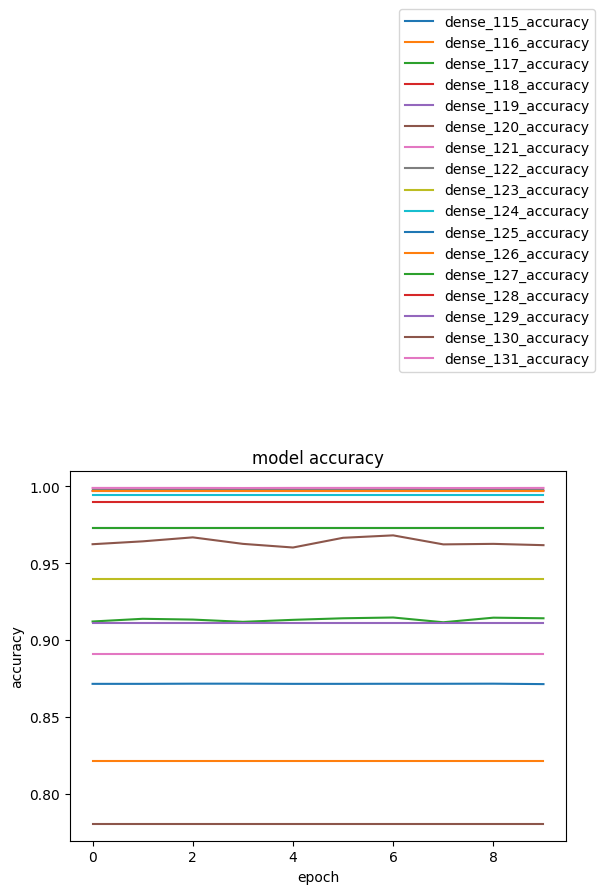

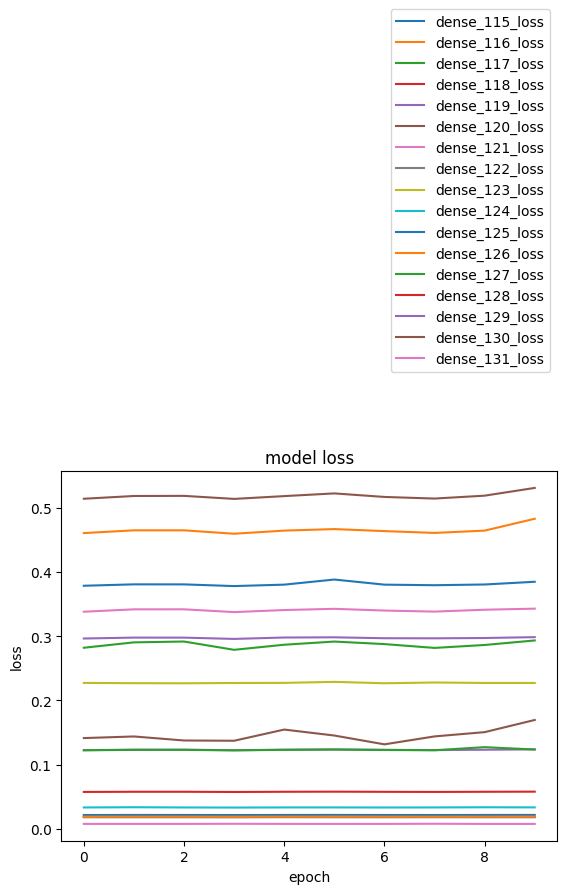

In [ ]:
history = model.fit(x = final_merged_X,
          y = [y_train[0],y_train[1],y_train[2],y_train[3],y_train[4],y_train[5],y_train[6],y_train[7],y_train[8],y_train[9],y_train[10],y_train[11],y_train[12],y_train[13],y_train[14],y_train[15],y_train[16]],
          epochs = 10,
          batch_size = 16,
          verbose =2
)

# list all data in history
print(history.history.keys())

accuracy_labels = ["dense_"+str(i)+"_accuracy" for i in range(115,132) ]
loss_labels = ["dense_" + str(i) + "_loss" for i in range(115,132)]
# summarize history for accuracy

for i in range(17):
  plt.plot(history.history[accuracy_labels[i]])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(accuracy_labels,bbox_to_anchor =(0.65, 1.25))
plt.show()
# summarize history for loss
for i in range(17):
  plt.plot(history.history[loss_labels[i]])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loss_labels,bbox_to_anchor =(0.65, 1.25))
plt.show()